# Sesión 1

In [1]:
import numpy as np 
from numpy.linalg import inv
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import t

# Regresión Lineal Simple


In [2]:
cols_headers = "Estatura Peso Pie Brazo Espalda Craneo Rodilla".split()
df = pd.read_csv('./Datos1F.txt', names=cols_headers)
df.tail()

,Estatura,Peso,Pie,Brazo,Espalda,Craneo,Rodilla
22,155.0,53.0,36.0,67.0,43.0,56.0,38.0
23,189.0,87.0,45.0,82.0,53.0,61.0,52.0
24,170.0,70.0,38.0,73.0,45.0,56.0,43.0
25,170.0,67.0,40.0,77.0,46.5,58.0,44.0
26,168.0,56.0,37.5,70.5,48.0,60.0,40.0


In [3]:
df.describe()

,Estatura,Peso,Pie,Brazo,Espalda,Craneo,Rodilla
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,168.777778,63.888889,38.981481,73.462963,45.851852,57.240741,43.074074
std,10.195524,12.801242,2.863838,4.957368,4.021134,1.841667,3.149187
min,152.000000,43.000000,34.000000,66.000000,36.000000,54.000000,38.000000
25%,160.000000,52.000000,36.000000,69.500000,43.500000,56.000000,41.000000
50%,168.000000,65.000000,39.000000,73.000000,46.000000,57.000000,43.000000
75%,177.000000,73.500000,41.000000,76.500000,48.000000,58.500000,44.500000
max,189.000000,91.000000,45.000000,83.000000,53.000000,61.000000,52.000000


In [4]:
lm = smf.ols('Estatura~Peso', df)
lm_fit = lm.fit()

In [5]:
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Estatura   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     55.46
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           8.45e-08
Time:                        21:38:22   Log-Likelihood:                -84.714
No. Observations:                  27   AIC:                             173.4
Df Residuals:                      25   BIC:                             176.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.5317      5.781     21.887      0.0

#### Conclusión
Con los datos que acabó de arrojar statsmodels se concluye que la recta de regresión es:

$$
Y = 126.5317 + 0.6612X
$$
donde $Y$ es la estatura y $X$ el peso

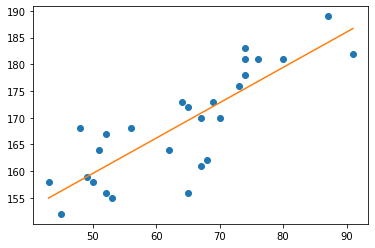

In [6]:
xx= np.linspace(df['Peso'].min(), df['Peso'].max())
yy = 126.5317 + 0.6612*xx
fig = plt.plot(df['Peso'], df['Estatura'],'o',xx,yy)

Otra forma de calcular los betas es usando matrices

In [7]:
Y = df['Estatura']
df['Ones'] = 1
X=df[['Ones','Peso']]
betas = inv(X.T @ X) @ (X.T @ Y)
betas

array([126.53173734,   0.66124237])

Los coeficientes encontrados son iguales que los hallados por el modelo de statsmodels

## Cálculo de los errores de estimación de los $\beta$

$$
V(\hat{\beta}_0) = C_{00}\sigma^2
$$
$$
V(\hat{\beta}_1) = C_{11}\sigma^2
$$
donde $C_{ii}$ es el elemento de la fila $i$ y columna $i$ de la matriz $(X^TX)^{-1}$

Para estimar $\sigma^2$ se usa una función de los datos muestrales. En este caso:

$$
\sigma^2=\frac{SEE}{(n-2)}
$$
donde 
$$
SSE = Y^TY-\beta^TX^TY
$$

In [8]:
SSE = Y.T @ Y - betas.T @ X.T @ Y
n=len(Y)
S2=SSE/(n-2)
S2

33.58905961501412

In [9]:
# Errores en la estimación de los coeficientes betas
P = inv(X.T @ X)

C_00 = P[0,0]
C_11 = P[1,1]

var_b0 = C_00 * S2
var_b1 = C_11 * S2

# El error es la raiz cuadrada de la varianza del estimador
err0 = np.sqrt(var_b0)
err1 = np.sqrt(var_b1)

err0

5.781256064849965

In [10]:
err1

0.08878920007608997

Por statsmodels se obtuvieron los mismos resultados!

## Intervalos de confianza

$$
\left[\hat{\beta}_i - t_{\alpha/2} S\sqrt{C_{ii}} , \quad \hat{\beta}_i + t_{\alpha/2} S\sqrt{C_{ii}}\right]
$$

In [11]:
alpha = 1 - 0.95
lower_bound_b0 = betas[0] - t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(var_b0)
upper_bound_b0 = betas[0] + t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(var_b0)
lower_bound_b0, upper_bound_b0

(114.6250175900689, 138.4384570878635)

In [12]:
lower_bound_b1 = betas[1] - t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(var_b1)
upper_bound_b1 = betas[1] + t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(var_b1)
lower_bound_b1, upper_bound_b1

(0.47837759146091907, 0.8441071527105851)

Los intervalos de confianza son iguales que los obtenidos por statsmodels.

Ahora vamos a calcular el valor $P$ de la prueba de hipótesis

$$
H_0 : \beta_i = 0
$$
$$
H_a : \beta_i \neq 0
$$

Necesitamos un test para rechazar la hipótesis nula

$$
T = \frac{\hat{\beta}_i - \beta_{i0}}{S\sqrt{C_{ii}}}
$$
$$
\beta_{i0} = 0
$$

In [13]:
T_0 = betas[0]/(np.sqrt(var_b0))
T_1 = betas[1]/(np.sqrt(var_b1))
T_0, T_1

(21.886547822761063, 7.447328858904969)

In [14]:
t.ppf(0.975, df = len(Y)-len(betas))

2.059538552753294

Con $\alpha = 5\% $ se rechaza $H_0$.

Calculemos el nivel de significancia alcanzado, es decir, el p-value, que equivale a encontrar el área bajo la curva de la distribución de probabilidad suponiendo que la hipótesis nula $H_0$ es verdadera.

El valor del estádistico de prueba calculado con los datos observados fue de $T_0 = 21.8865$ y $T_1=7.4473$

In [15]:
p_value_0 = t.cdf(-T_0, df=len(Y) - len(betas))
p_value_1 = t.cdf(-T_1, df=len(Y) - len(betas))
p_value_0, p_value_1

(3.994404174819729e-18, 4.223976154920601e-08)

Para estos valores, siempre se rechaza $H_0$